# Perceptron

A **perceptron** is one of the simplest types of artificial neural networks and is primarily used as a binary classifier. It was introduced by **Frank Rosenblatt** in 1958 and is the foundational building block for modern neural networks.

---

## What is a Perceptron?
- A perceptron takes multiple **inputs**, applies **weights**, sums them up, and passes the result through an **activation function** (commonly a step function) to produce an **output**.
- If the weighted sum exceeds a certain threshold, the output is 1 (positive class), otherwise, it's 0 (negative class).

---

## Structure of a Perceptron

### Components:
1. **Inputs**: \( x_1, x_2, \dots, x_n \) (features of the data)
2. **Weights**: \( w_1, w_2, \dots, w_n \) (importance assigned to each input)
3. **Bias**: \( b \) (helps adjust the output independent of inputs)
4. **Activation Function**: Determines if the perceptron "fires" (e.g., step function).

---

## Mathematical Representation

The perceptron computes the weighted sum of inputs:
\[
z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
\]

The output \( y \) is given by the activation function:
\
y = \begin{cases} 
1 & \text{if } z > 0 \\
0 & \text{otherwise}
\end{cases}


---

## Training a Perceptron

The perceptron learns by updating its weights using a simple learning rule:
1. For each training example, calculate the predicted output.
2. Update weights if the prediction is incorrect:
\[
w_i = w_i + \eta (y_{\text{true}} - y_{\text{pred}}) x_i
\]
   - \( \eta \): Learning rate (controls the step size)
   - \( y_{\text{true}} \): Actual label
   - \( y_{\text{pred}} \): Predicted label

---

## Key Features

- **Linearly Separable Data**: A perceptron can only classify data that is linearly separable.
- **Limitation**: Cannot solve problems like the XOR problem, as they are not linearly separable.

---

## Applications

- Binary classification problems
- Simple decision-making tasks
- Foundation for modern neural networks (Multi-layer Perceptrons - MLPs)

---

## Example: Logical AND

| Input \( x_1 \) | Input \( x_2 \) | Output \( y \) |
|-----------------|-----------------|----------------|
| 0               | 0               | 0              |
| 0               | 1               | 0              |
| 1               | 0               | 0              |
| 1               | 1               | 1              |

Using a perceptron, we can learn the weights \( w_1 \) and \( w_2 \) to classify the AND logic.



## Load Libraries

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    precision_score, 
    recall_score, 
    f1_score
)

## Load and Process Data

In [2]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Preprocessing: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split Data and Create Custom Classifier

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Create Perceptron Classifier
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.losses = []
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            epoch_loss = 0
            for idx, x_i in enumerate(X):
                # Linear prediction
                linear_model = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation(linear_model)
                
                # Calculate error and update weights/bias
                loss = y[idx] - y_predicted
                update = self.learning_rate * loss
                
                self.weights += update * x_i
                self.bias += update
                
                # Accumulate epoch loss
                epoch_loss += loss**2
            
            # Store average loss for the epoch
            self.losses.append(epoch_loss / n_samples)
        
        return self
    
    def _activation(self, X):
        return np.where(X > 0, 1, 0)
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._activation(linear_model)

## Train and Predict on Test Data

In [4]:
# Train Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X_train, y_train)

# Predict on test data
y_pred = perceptron.predict(X_test)

## Evaluate Performance

In [5]:
print("Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Precision, Recall, F1-Score
print("\nDetailed Metrics:")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Performance Metrics:
Accuracy: 0.9298245614035088

Confusion Matrix:
[[42  1]
 [ 7 64]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91        43
           1       0.98      0.90      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114


Detailed Metrics:
Precision: 0.9846153846153847
Recall: 0.9014084507042254
F1-Score: 0.9411764705882353


## Visualization and Feature Importance Analysis

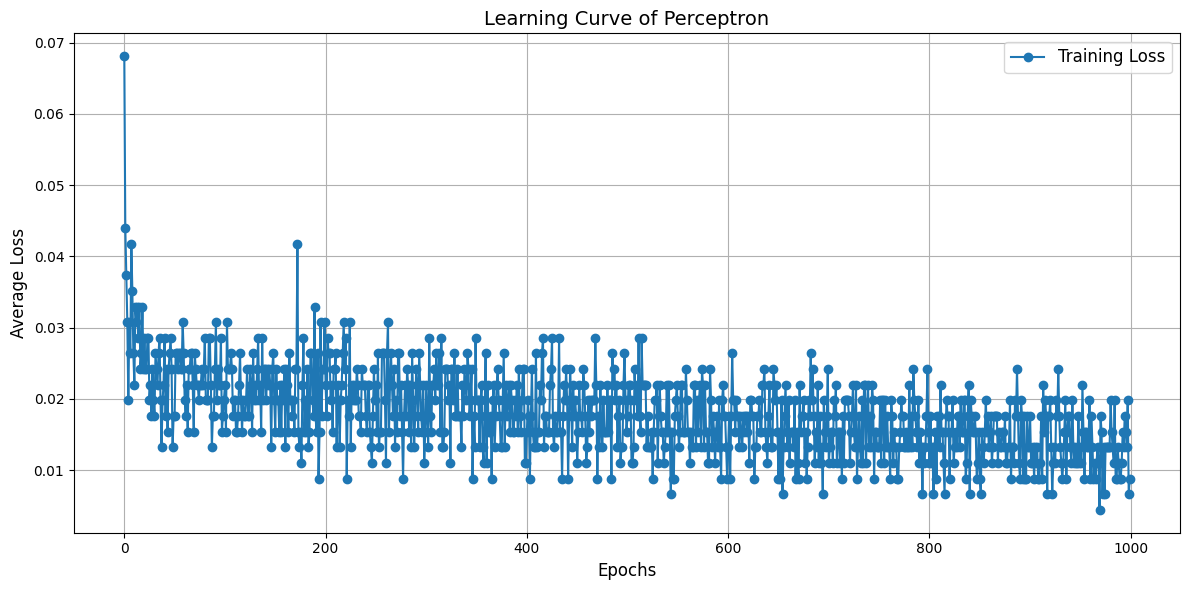

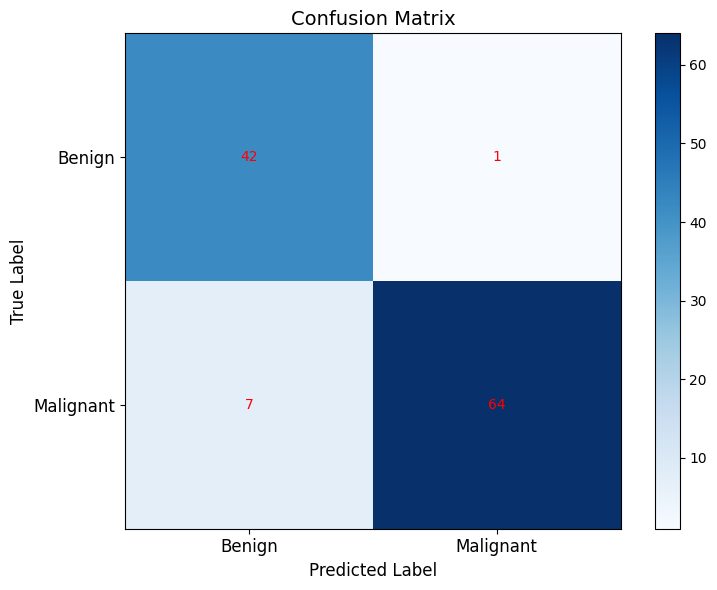

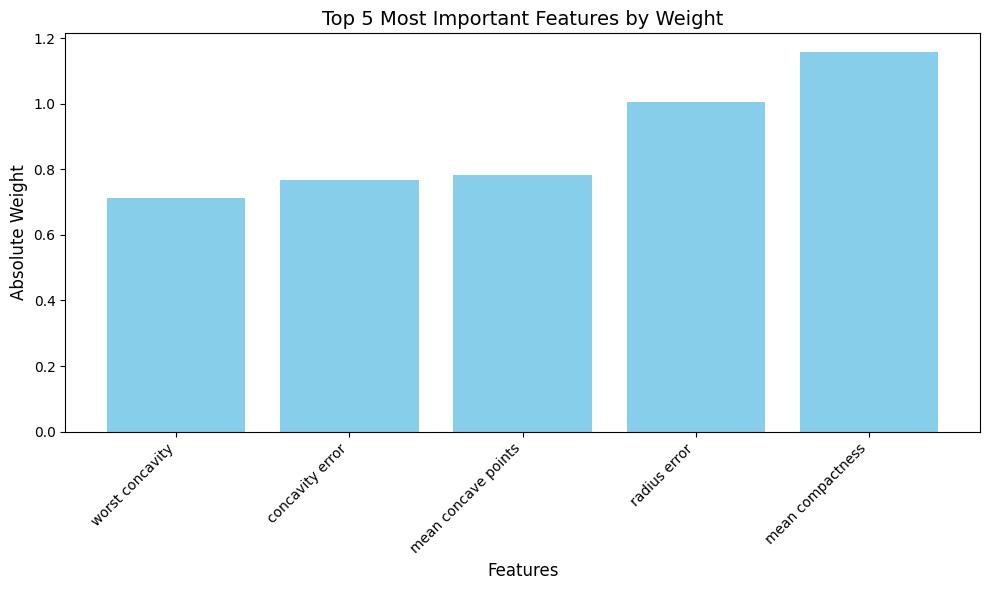

In [6]:


# Visualization: Learning Curve
plt.figure(figsize=(12, 6))
plt.plot(perceptron.losses, marker='o', label='Training Loss')
plt.title('Learning Curve of Perceptron', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Average Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=14)
plt.colorbar()
plt.xticks([0, 1], ['Benign', 'Malignant'], fontsize=12)
plt.yticks([0, 1], ['Benign', 'Malignant'], fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red")
plt.tight_layout()
plt.show()

# Feature Importance Analysis
feature_importance = np.abs(perceptron.weights)
top_features_indices = np.argsort(feature_importance)[-5:]
top_features_names = [cancer.feature_names[i] for i in top_features_indices]

plt.figure(figsize=(10, 6))
plt.bar(top_features_names, feature_importance[top_features_indices], color='skyblue')
plt.title('Top 5 Most Important Features by Weight', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Absolute Weight', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


# Key Insights

1. **Learning Curve**  
   The learning curve demonstrates how the perceptron converges as training progresses, shown by decreasing loss.

2. **Confusion Matrix**  
   The confusion matrix provides a detailed view of model predictions versus actual labels.

3. **Feature Importance**  
   Feature importance highlights the top features contributing to the decision boundary.

---

# Key Observations

- High accuracy suggests the perceptron effectively classifies the dataset, but further improvements may require non-linear models.
- The top features indicate which attributes of the dataset (e.g., cell size, texture) are most influential.
